# Regression Modeling in Practice
### Week 2: Test a Basic Linear Regression Model

I am now ready to test a basic linear regression model to seek the relationship between internet use rate and income per person. Before I run the model though, I will need  to center the mean of the explanatory variable, income per person.

First, load the data

In [1]:
'''
Code for Peer-graded Assignments: Test a Basic Linear Regression Model
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_csv('gapminder.csv', low_memory=False)

Set the variables to numeric

In [2]:
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')

Center the explanatory variable; ie, set the mean of the data to equal zero

In [5]:
data_centered = data.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
print ('Mean of', data_centered[['incomeperperson']].mean())

Mean of incomeperperson   -3.934761e-12
dtype: float64


The mean is not exactly 0 due to errors in float representation

Run scatterplot of internetuserate with centered incomeperperson

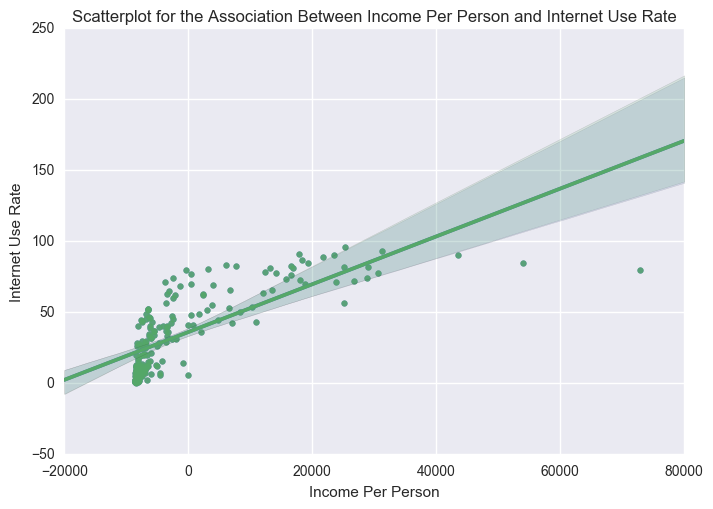

In [7]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

OLS regression model for the association between income per person and internet use rate

In [8]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.89e-34
Time:                        16:05:57   Log-Likelihood:                -792.90
No. Observations:                 183   AIC:                             1590.
Df Residuals:                     181   BIC:                             1596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.0622      1.371     26.308      0.000        33.357    38.767
incomeperperson     0.0017      0.000     15.299      0.000         0.001     0.002
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                5.081
Skew:                           0.012   Prob(JB):                       0.0788
Kurtosis:                       3.816   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the majority of data points are clustered near, but below, 0 with a long tail reaching to the right. This is in agreement with the mean centered at 0 and also indicative that the vast majority of countries have low incomes with a few having very, very high incomes. The results indicate that income per person is significantly and positively associated with internet use rate in a country according to the equation **`[internet use rate] = .0017 * [income per person] + 36.0622`**. I suspect a linear regression line is not the best fit possible, the curve does appear to be logarithmic in shape; but for the sake of this demonstration a linear line is fine.